In [1]:
!pip install import-ipynb
import import_ipynb
#from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
!pip install torchsummary
from torchsummary import summary
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
import os
%load_ext autoreload
%autoreload 2

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=d124b5cd85915b2a09c5a1ed5fc3fde339b4fdb3642db3bdb9f9ed49f2946bf4
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [0]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
%cd "/content/gdrive/My Drive/Colab Notebooks"

/content/gdrive/My Drive/Colab Notebooks


In [0]:
#ls

In [6]:
from Dataloaders import train_test_dataloaders,transformations
from Models import BasicBlock,Bottleneck,ResNet,ResNet18,model_params,Net,model_params
from Graphs_And_Other_Utility_Functions import plot,save_model,get_lr
from Train_Test import train,test

importing Jupyter notebook from Dataloaders.ipynb
importing Jupyter notebook from Models.ipynb
importing Jupyter notebook from Graphs_And_Other_Utility_Functions.ipynb
importing Jupyter notebook from Train_Test.ipynb


In [0]:
train_transforms , test_transforms=transformations()

In [8]:
trainloader, testloader = train_test_dataloaders(1, 128, 10, train_transforms , test_transforms)

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


In [0]:
model =  ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10,20,28], gamma=0.1)
epochs=35
input_size=(3,32,32)

  0%|          | 0/391 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

Loss=1.6758235692977905 Batch_id=390 Accuracy=30.77: 100%|██████████| 391/391 [00:53<00:00,  7.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0143, Accuracy: 3300/10000 (33.00%)

EPOCH: 1 LR: 0.1 


Loss=1.318835973739624 Batch_id=390 Accuracy=46.21: 100%|██████████| 391/391 [00:54<00:00,  7.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 4952/10000 (49.52%)

EPOCH: 2 LR: 0.1 


Loss=1.1014354228973389 Batch_id=390 Accuracy=57.95: 100%|██████████| 391/391 [00:54<00:00,  7.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 5438/10000 (54.38%)

EPOCH: 3 LR: 0.1 


Loss=0.9609931111335754 Batch_id=390 Accuracy=66.57: 100%|██████████| 391/391 [00:55<00:00,  7.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 6668/10000 (66.68%)

EPOCH: 4 LR: 0.1 


Loss=0.658261775970459 Batch_id=390 Accuracy=73.06: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7474/10000 (74.74%)

EPOCH: 5 LR: 0.1 


Loss=0.6312786936759949 Batch_id=390 Accuracy=76.63: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7396/10000 (73.96%)

EPOCH: 6 LR: 0.1 


Loss=0.5829102993011475 Batch_id=390 Accuracy=79.44: 100%|██████████| 391/391 [00:55<00:00,  7.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7812/10000 (78.12%)

EPOCH: 7 LR: 0.1 


Loss=0.5290816426277161 Batch_id=390 Accuracy=80.78: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7930/10000 (79.30%)

EPOCH: 8 LR: 0.1 


Loss=0.3830839693546295 Batch_id=390 Accuracy=81.99: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7873/10000 (78.73%)

EPOCH: 9 LR: 0.1 


Loss=0.5076426267623901 Batch_id=390 Accuracy=82.79: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8129/10000 (81.29%)

EPOCH: 10 LR: 0.010000000000000002 


Loss=0.26730939745903015 Batch_id=390 Accuracy=88.72: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8827/10000 (88.27%)

EPOCH: 11 LR: 0.010000000000000002 


Loss=0.15579144656658173 Batch_id=390 Accuracy=90.69: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8929/10000 (89.29%)

EPOCH: 12 LR: 0.010000000000000002 


Loss=0.37682706117630005 Batch_id=390 Accuracy=91.23: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8955/10000 (89.55%)

EPOCH: 13 LR: 0.010000000000000002 


Loss=0.29844197630882263 Batch_id=390 Accuracy=92.03: 100%|██████████| 391/391 [00:55<00:00,  7.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8969/10000 (89.69%)

EPOCH: 14 LR: 0.010000000000000002 


Loss=0.18257884681224823 Batch_id=390 Accuracy=92.51: 100%|██████████| 391/391 [00:55<00:00,  7.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8966/10000 (89.66%)

EPOCH: 15 LR: 0.010000000000000002 


Loss=0.17080926895141602 Batch_id=390 Accuracy=92.81: 100%|██████████| 391/391 [00:55<00:00,  7.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9003/10000 (90.03%)

EPOCH: 16 LR: 0.010000000000000002 


Loss=0.21382088959217072 Batch_id=390 Accuracy=93.47: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9010/10000 (90.10%)

EPOCH: 17 LR: 0.010000000000000002 


Loss=0.26430585980415344 Batch_id=390 Accuracy=93.91: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9022/10000 (90.22%)

EPOCH: 18 LR: 0.010000000000000002 


Loss=0.15135036408901215 Batch_id=390 Accuracy=94.12: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9027/10000 (90.27%)

EPOCH: 19 LR: 0.010000000000000002 


Loss=0.3243693709373474 Batch_id=390 Accuracy=94.41: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8987/10000 (89.87%)

EPOCH: 20 LR: 0.0010000000000000002 


Loss=0.10181770473718643 Batch_id=390 Accuracy=95.86: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9103/10000 (91.03%)

EPOCH: 21 LR: 0.0010000000000000002 


Loss=0.21741612255573273 Batch_id=390 Accuracy=96.47: 100%|██████████| 391/391 [00:55<00:00,  7.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9128/10000 (91.28%)

EPOCH: 22 LR: 0.0010000000000000002 


Loss=0.11063669621944427 Batch_id=390 Accuracy=96.73: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9132/10000 (91.32%)

EPOCH: 23 LR: 0.0010000000000000002 


Loss=0.06613678485155106 Batch_id=390 Accuracy=96.81: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9133/10000 (91.33%)

EPOCH: 24 LR: 0.0010000000000000002 


Loss=0.18067803978919983 Batch_id=390 Accuracy=97.04: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9118/10000 (91.18%)

EPOCH: 25 LR: 0.0010000000000000002 


Loss=0.13129480183124542 Batch_id=390 Accuracy=97.08: 100%|██████████| 391/391 [00:55<00:00,  7.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9154/10000 (91.54%)

EPOCH: 26 LR: 0.0010000000000000002 


Loss=0.06024300307035446 Batch_id=390 Accuracy=97.28: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9136/10000 (91.36%)

EPOCH: 27 LR: 0.0010000000000000002 


Loss=0.0670941025018692 Batch_id=390 Accuracy=97.40: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9134/10000 (91.34%)

EPOCH: 28 LR: 0.00010000000000000003 


Loss=0.14015290141105652 Batch_id=390 Accuracy=97.60: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9141/10000 (91.41%)

EPOCH: 29 LR: 0.00010000000000000003 


Loss=0.13671526312828064 Batch_id=390 Accuracy=97.58: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9143/10000 (91.43%)

EPOCH: 30 LR: 0.00010000000000000003 


Loss=0.09611964970827103 Batch_id=390 Accuracy=97.58: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9147/10000 (91.47%)

EPOCH: 31 LR: 0.00010000000000000003 


Loss=0.0895654633641243 Batch_id=390 Accuracy=97.52: 100%|██████████| 391/391 [00:55<00:00,  7.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9150/10000 (91.50%)

EPOCH: 32 LR: 0.00010000000000000003 


Loss=0.06281379610300064 Batch_id=390 Accuracy=97.66: 100%|██████████| 391/391 [00:55<00:00,  6.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9154/10000 (91.54%)

EPOCH: 33 LR: 0.00010000000000000003 


Loss=0.06202152371406555 Batch_id=390 Accuracy=97.64: 100%|██████████| 391/391 [00:55<00:00,  7.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9156/10000 (91.56%)

EPOCH: 34 LR: 0.00010000000000000003 


Loss=0.04163803905248642 Batch_id=390 Accuracy=97.59: 100%|██████████| 391/391 [00:55<00:00,  6.99it/s]



Test set: Average loss: 0.0021, Accuracy: 9159/10000 (91.59%)



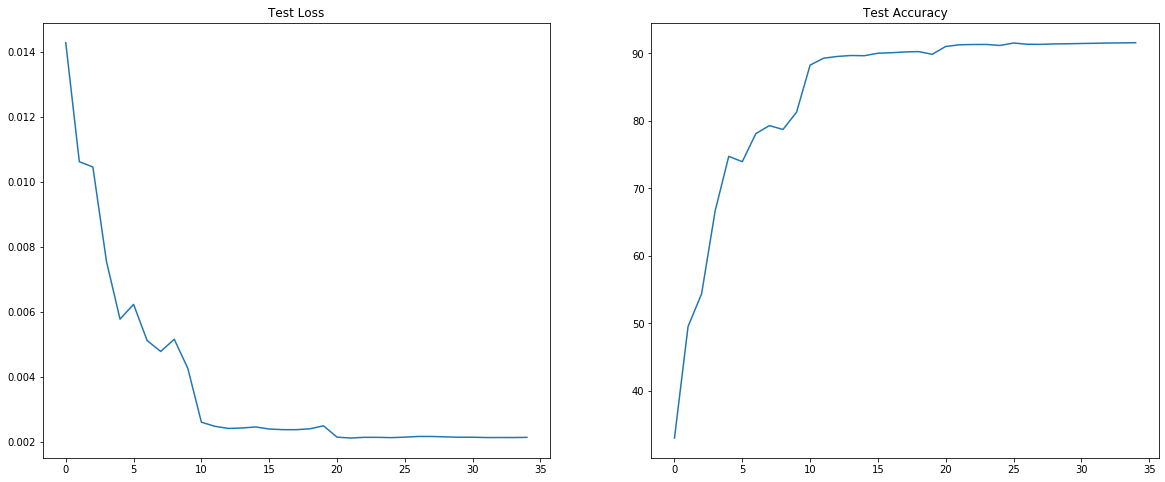

In [10]:
train_losses_without_L1_L2 = []
test_losses_without_L1_L2 = []
train_acc_without_L1_L2 = []
test_acc_without_L1_L2 = []
model_params(model, input_size,device)  

for epoch in range(epochs):
    print("EPOCH: %s LR: %s " % (epoch, get_lr(optimizer)))
    train(model, device, trainloader, optimizer, epoch, False, train_acc_without_L1_L2, train_losses_without_L1_L2)
    test(model, device, testloader, test_acc_without_L1_L2, test_losses_without_L1_L2, {})
    scheduler.step()
plot(train_losses_without_L1_L2,train_acc_without_L1_L2, test_losses_without_L1_L2, test_acc_without_L1_L2, 'without L1 and L2')
save_model(model, '/content/gdrive/My Drive/Assign-8.pth')

In [11]:
checkpoint = torch.load('/content/gdrive/My Drive/Assign-8.pth')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [12]:
model.train()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=